In [1]:
import numpy as np 
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed, FloatRangeSlider

In [44]:
from py_vollib.black_scholes import black_scholes as bs 

In [3]:
S = np.arange(30,170,0.1)
K = 100
T = 1
r = 0.1
vol = 0.3

In [2]:
def call_BS(S,K,T,r,vol):
    d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    return S*N(d1) - K*np.exp(-r*T)*N(d2)

def put_BS(S,K,T,r,vol):
    d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2)-S*N(-d1)

## Hedging Strategies - Protective Put

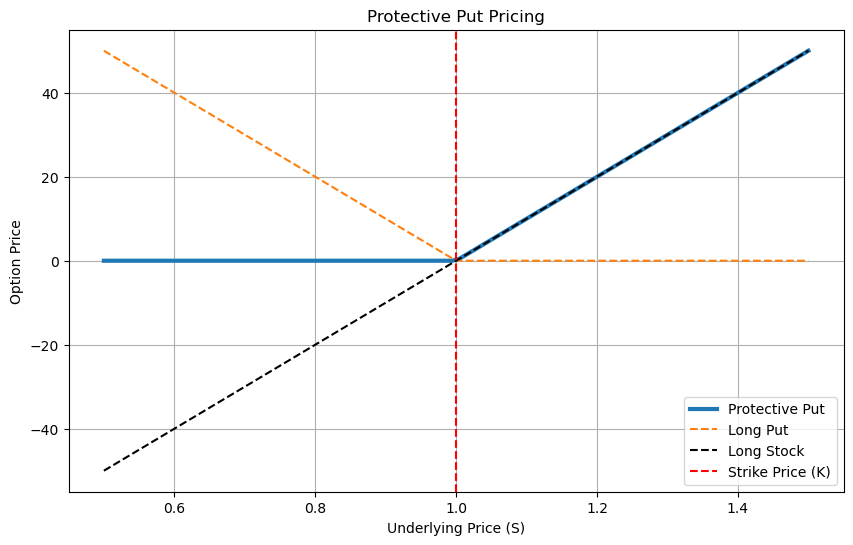

In [28]:
def plot_protectiveput(S,K,T,r,vol):
    payoff_long = [max(0,K-s) for s in S]
    return payoff_long+(S-K)


plt.figure(figsize=(10, 6))
plt.plot(S/K, plot_protectiveput(S,K,T,r,vol), label=f'Protective Put',linewidth=3)
plt.plot(S/K,plot_protectiveput(S,K,T,r,vol)-S+K,linestyle="--",label = 'Long Put')
plt.plot(S/K,S-K,linestyle="--",label = 'Long Stock',color="Black")
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title(f'Protective Put Pricing')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

## Hedging Strategies - Writing (short) Covered Call 

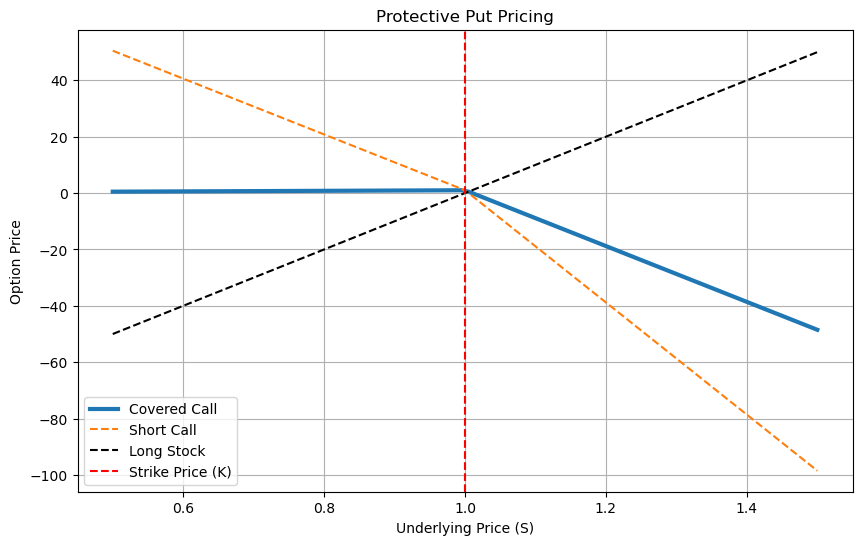

In [46]:
def plot_covered_call(S,K,T,r,vol):
    short_call = [-max(0,s-K) for s in S]
    return short_call +S/K #short call + long underlying


plt.figure(figsize=(10, 6))
plt.plot(S/K, plot_covered_call(S,K,T,r,vol), label=f'Covered Call',linewidth=3)
plt.plot(S/K,plot_covered_call(S,K,T,r,vol)-S+K,linestyle="--",label = 'Short Call')
plt.plot(S/K,S-K,linestyle="--",label = 'Long Stock',color="Black")
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title(f'Protective Put Pricing')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

## Vertical Spread - Bull Call Spread

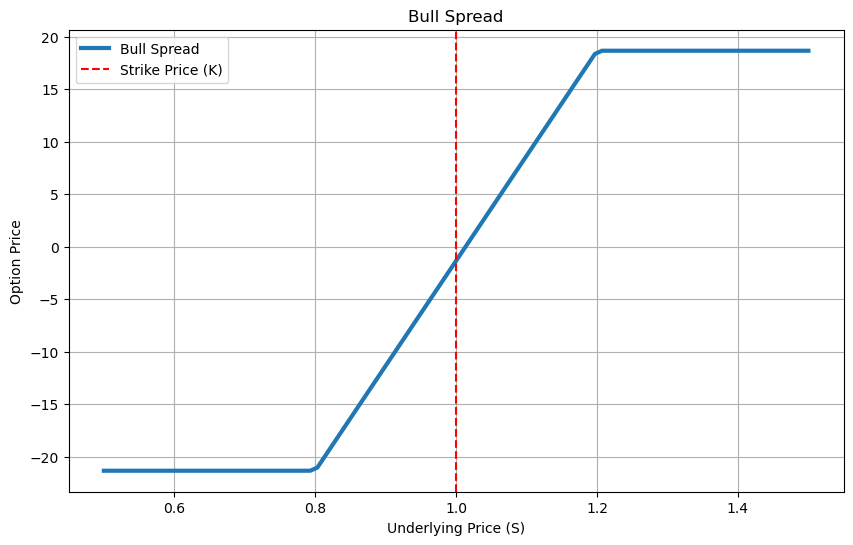

In [47]:
def bull_spread(S,K1,K2,T,r,vol):
    payoff_long = bs('c', 100, K1, T, r, vol)
    payoff_short = bs('c', 100, K2, T, r, vol)
    return [max(0,s-K1)-payoff_long-max(0,s-K2)+payoff_short for s in S]


plt.figure(figsize=(10, 6))
plt.plot(S/K, bull_spread(S,80,120,T,r,vol), label=f'Bull Spread',linewidth=3)
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title(f'Bull Spread')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

At the beginning it's negative because the price of the option that we long (K1) is higher than the option that we short. Because K1 is in the money and K2 out of the money (so cheaper)

## Vertical Spread - Bull Put Spread

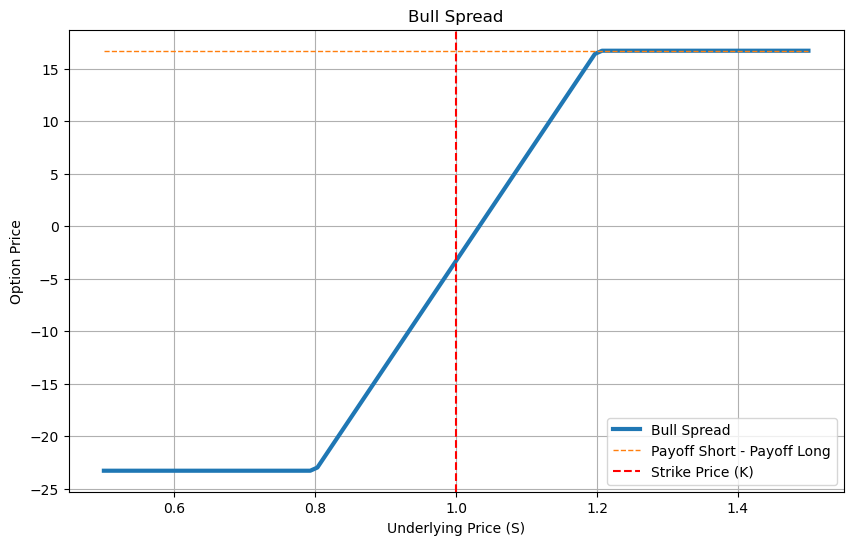

In [60]:
def bull_put_spread(S,K1,K2,T,r,vol):
    payoff_long = bs('p', 100, K1, T, r, vol)
    payoff_short = bs('p', 100, K2, T, r, vol)
    return [max(0,K1-s)-payoff_long-max(0,K2-s)+payoff_short for s in S]

plt.figure(figsize=(10, 6))
plt.plot(S/K, bull_put_spread(S,80,120,T,r,vol), label=f'Bull Spread',linewidth=3)
plt.plot(S/K,[-bs('p', 100, 80, T, r, vol)+bs('p', 100, 120, T, r, vol)]*100, label=f'Payoff Short - Payoff Long',linestyle='--',linewidth=1)
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title(f'Bull Spread')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

Here the maxiumum of money earn correspond to the payoff received at the sell of the put spread (this is because the payoff is negative)

## Vertical Spread - Bear Put Spread

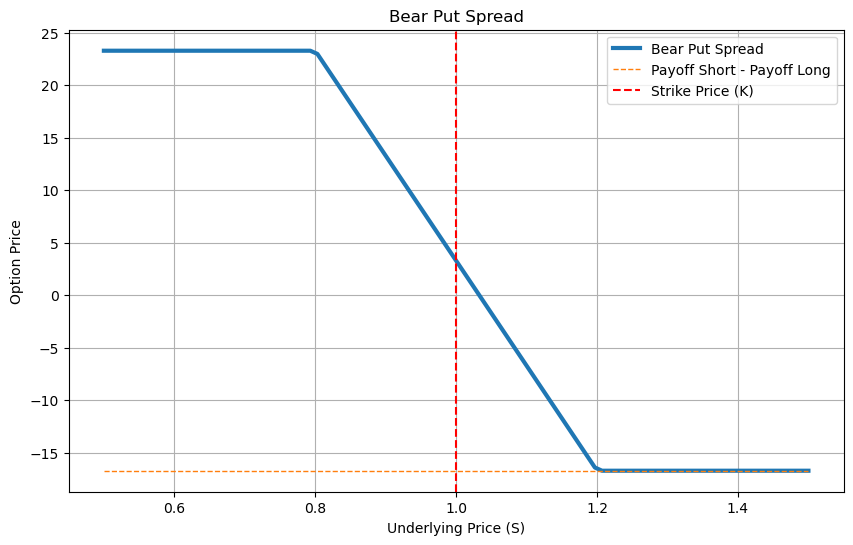

In [63]:
def bear_put_spread(S,K1,K2,T,r,vol):
    payoff_long = bs('p', 100, K2, T, r, vol)
    payoff_short = bs('p', 100, K1, T, r, vol)
    return [-max(0,K1-s)-payoff_long+max(0,K2-s)+payoff_short for s in S]

plt.figure(figsize=(10, 6))
plt.plot(S/K, bear_put_spread(S,80,120,T,r,vol), label=f'Bear Put Spread',linewidth=3)
plt.plot(S/K,[+bs('p', 100, 80, T, r, vol)-bs('p', 100, 120, T, r, vol)]*100, label=f'Payoff Short - Payoff Long',linestyle='--',linewidth=1)
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title(f'Bear Put Spread')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

Here Payoff Short - Payoff Long is negative because of the skew (we short an OTM option and long an ITM option). 
The holder of the spread can earn (maximum) : K2-K1 - (Payoff Short - Payoff Long) = 40-17=23

## Vertical Spread - Bearish Call Spread

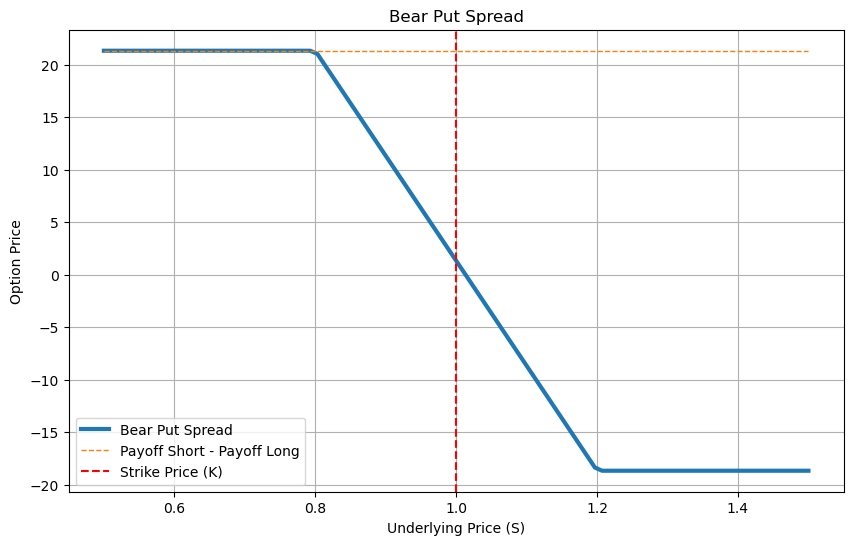

In [68]:
def bear_put_spread(S,K1,K2,T,r,vol):
    payoff_long = bs('c', 100, K2, T, r, vol)
    payoff_short = bs('c', 100, K1, T, r, vol)
    return [-max(0,s-K1)-payoff_long+max(0,s-K2)+payoff_short for s in S]

plt.figure(figsize=(10, 6))
plt.plot(S/K, bear_put_spread(S,80,120,T,r,vol), label=f'Bear Put Spread',linewidth=3)
plt.plot(S/K,[bs('c', 100, 80, T, r, vol)-bs('c', 100, 120, T, r, vol)]*100, label=f'Payoff Short - Payoff Long',linestyle='--',linewidth=1)
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title(f'Bear Put Spread')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()

## Butterfly Spread

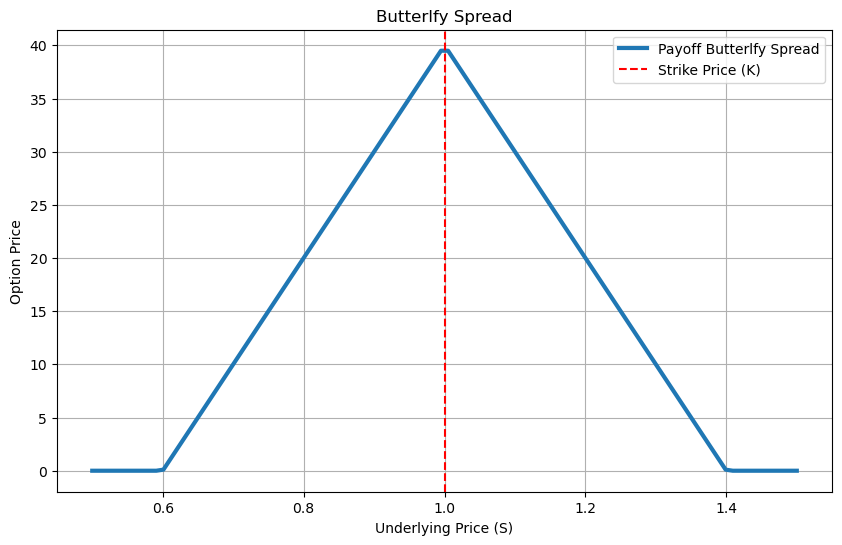

In [76]:
def butterfly_spread(S,K1,K2,T,r,vol):
    return [max(0,s-K1)+max(0,s-K2)-2*max(0,s-(K1+K2)/2) for s in S]

plt.figure(figsize=(10, 6))
plt.plot(S/K, butterfly_spread(S,60,140,T,r,vol), label=f'Payoff Butterlfy Spread',linewidth=3)
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title(f'Butterlfy Spread')
plt.xlabel('Underlying Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid()
plt.show()